# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

# 2. Import Data

In [2]:
path = r'/Users/golde/Crime Analysis/'

In [3]:
crimes = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'crimes_cleaned.csv'))

In [7]:
pd.options.display.max_rows = None

In [8]:
pd.options.display.max_columns = None

In [9]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Census Tracts,Wards,Region
0,0,10224738,HY411648,9/5/15 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/18 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)",706.0,3.0,Center
1,1,10224739,HY411615,9/4/15 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/18 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)",562.0,45.0,Center
2,3,10224740,HY411595,9/5/15 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/18 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)",216.0,12.0,North Side
3,4,10224741,HY411610,9/5/15 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/18 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)",696.0,23.0,Center
4,5,10224742,HY411435,9/5/15 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/18 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)",575.0,13.0,South Side


In [10]:
# drop unnamed
crimes = crimes.drop(columns = ['Unnamed: 0'])

In [11]:
crimes.shape

(1012416, 25)

# 3. Create Heatmap

In [12]:
crimes.corr()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Census Tracts,Wards
ID,1.000000,-0.026404,0.009325,-0.002137,-0.001878,0.013530,-0.012886,0.013188,0.007050,0.955636,0.006985,0.013416,-0.007248,0.006723
Arrest,-0.026404,1.000000,-0.032947,-0.034147,-0.034293,-0.025229,0.033502,-0.027551,-0.042143,-0.015405,-0.041943,-0.028425,0.007915,-0.014750
Domestic,0.009325,-0.032947,1.000000,-0.054773,-0.054810,-0.082341,0.100567,0.016955,-0.114883,0.012496,-0.114707,0.015281,0.010216,-0.029530
Beat,-0.002137,-0.034147,-0.054773,1.000000,0.999814,0.654248,-0.486090,-0.547207,0.623719,-0.003647,0.624547,-0.542217,0.027816,0.075032
District,-0.001878,-0.034293,-0.054810,0.999814,1.000000,0.655698,-0.486737,-0.548011,0.624934,-0.003498,0.625763,-0.543008,0.028025,0.074222
Ward,0.013530,-0.025229,-0.082341,0.654248,0.655698,1.000000,-0.532777,-0.436372,0.654767,0.011790,0.655081,-0.429965,0.069135,0.058569
Community Area,-0.012886,0.033502,0.100567,-0.486090,-0.486737,-0.532777,1.000000,0.244271,-0.775890,-0.010962,-0.775183,0.234541,0.064792,-0.191227
X Coordinate,0.013188,-0.027551,0.016955,-0.547207,-0.548011,-0.436372,0.244271,1.000000,-0.545407,0.013091,-0.548153,0.999918,-0.079900,0.112634
Y Coordinate,0.007050,-0.042143,-0.114883,0.623719,0.624934,0.654767,-0.775890,-0.545407,1.000000,0.004652,0.999995,-0.534651,-0.021429,0.033671
Year,0.955636,-0.015405,0.012496,-0.003647,-0.003498,0.011790,-0.010962,0.013091,0.004652,1.000000,0.004593,0.013281,-0.007065,0.005967


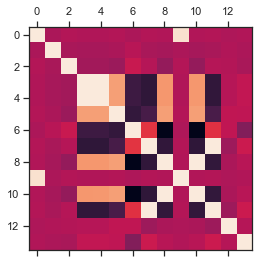

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(crimes.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

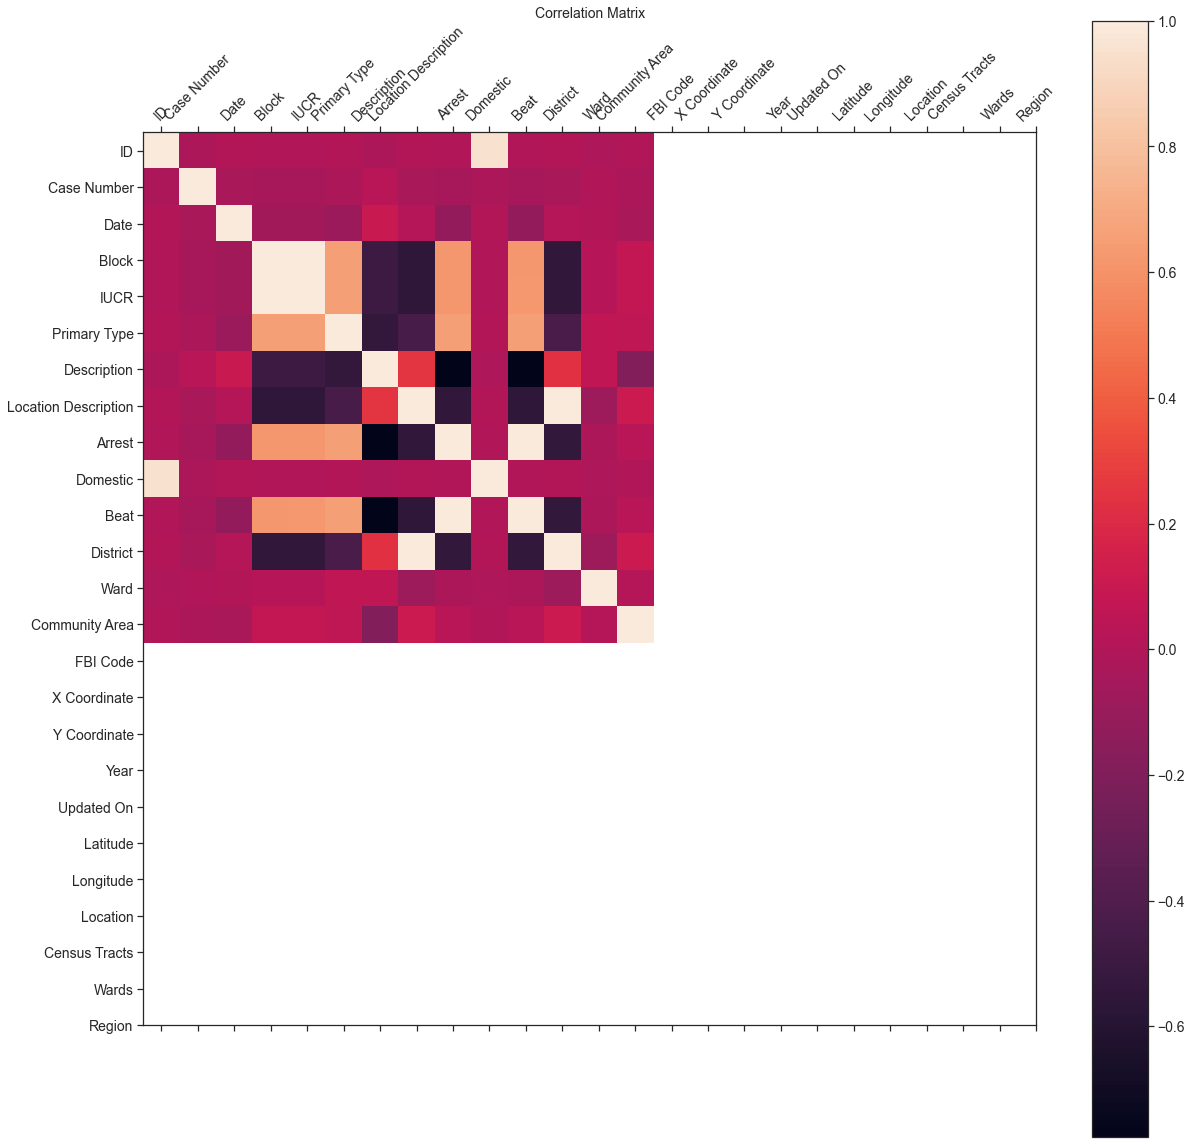

In [14]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(20,20)) # figure size 

plt.matshow(crimes.corr(), fignum=f.number) # type of plot
plt.xticks(range(crimes.shape[1]), crimes.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(crimes.shape[1]), crimes.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


There is some correlation between variables.

# 4. Create Scatterplot

In [15]:
sub = crimes[['Beat','District','Ward','Community Area','FBI Code','X Coordinate','Y Coordinate','Year','Updated On','Latitude','Longitude','Location','Census Tracts','Wards']]

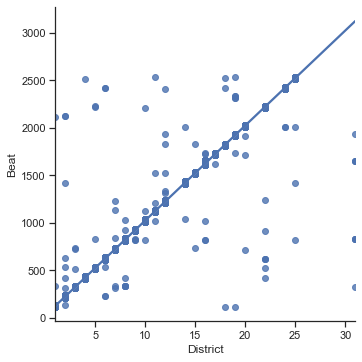

In [16]:
# Create a scatterplot for the "district" and "beat" columns in seaborn

sns.lmplot(x = 'District', y = 'Beat', data = sub[['District','Beat']])

There is some correlation between District and Beat.

# 5. Create Pair Plot

In [17]:
sub_2 = crimes[['Beat','District','Ward','Community Area','FBI Code','Year','Updated On','Location','Census Tracts','Wards']]

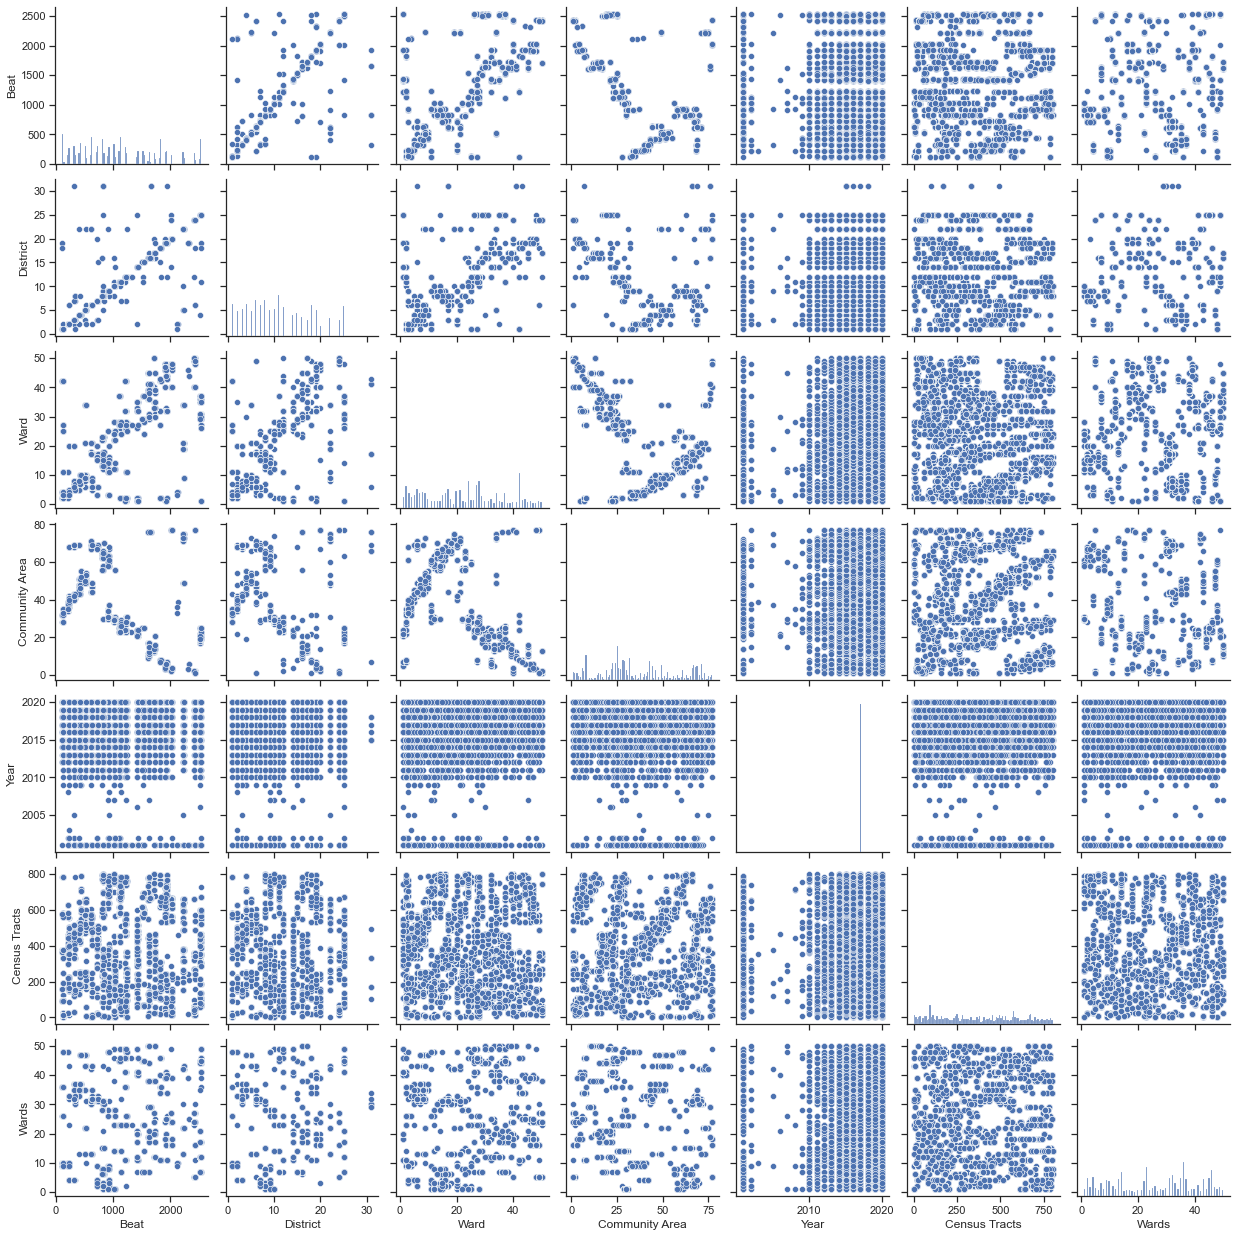

In [18]:
g = sns.pairplot(sub_2)

The graphs show a huge increase of data or arrests since 2010. 

# 6. Create Categorical Graph

In [4]:
# create categories (From https://chicagoelections.gov/en/ward-maps-and-aldermen.html)

crimes.loc[(crimes['Ward'] == 44) | (crimes['Ward'] == 50) | (crimes['Ward'] == 49) | (crimes['Ward'] == 47) | (crimes['Ward'] == 46) | (crimes['Ward'] == 40) | (crimes['Ward'] == 33) | (crimes['Ward'] == 35) | (crimes['Ward'] == 39) | (crimes['Ward'] == 45) | (crimes['Ward'] == 38) | (crimes['Ward'] == 41) | (crimes['Ward'] == 36) | (crimes['Ward'] == 30) | (crimes['Ward'] == 31), 'Region'] = 'North Side'
crimes.loc[(crimes['Ward'] == 4) | (crimes['Ward'] == 3) | (crimes['Ward'] == 12) | (crimes['Ward'] == 11) | (crimes['Ward'] == 29) | (crimes['Ward'] == 26) | (crimes['Ward'] == 37) | (crimes['Ward'] == 1) | (crimes['Ward'] == 32) | (crimes['Ward'] == 43) | (crimes['Ward'] == 2) | (crimes['Ward'] == 27) | (crimes['Ward'] == 42) | (crimes['Ward'] == 28) | (crimes['Ward'] == 24) | (crimes['Ward'] == 22) | (crimes['Ward'] == 25), 'Region'] = 'Center'
crimes.loc[(crimes['Ward'] == 23) | (crimes['Ward'] == 14) | (crimes['Ward'] == 15) | (crimes['Ward'] == 13) | (crimes['Ward'] == 18) | (crimes['Ward'] == 19) | (crimes['Ward'] == 17) | (crimes['Ward'] == 16) | (crimes['Ward'] == 21) | (crimes['Ward'] == 6) | (crimes['Ward'] == 8) | (crimes['Ward'] == 20) | (crimes['Ward'] == 5) | (crimes['Ward'] == 7) | (crimes['Ward'] == 34) | (crimes['Ward'] == 9) | (crimes['Ward'] == 10), 'Region'] = 'South Side'


In [5]:
crimes['Region']

0              Center
1              Center
2          North Side
3              Center
4          South Side
              ...    
1012411    South Side
1012412        Center
1012413        Center
1012414    South Side
1012415    South Side
Name: Region, Length: 1012416, dtype: object

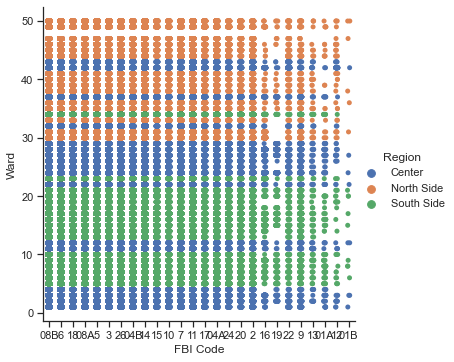

In [6]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="FBI Code", y="Ward", hue="Region", data=crimes)

Every ward has all types of arrest.